In [1]:
import pandas as pd

import scanpy as sc
import scFates as scf

import palantir

import rpy2

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# Specity subset of cells to analyze
cell_subset = ["S3x", "S3", "S5"]

name = "".join(cell_subset) + "_atac"  # string name

# Set scanpy figure directory
sc.settings.figdir = "figures/" + name
scf.settings.figdir = "figures/" + name 

In [3]:
# Load scRNA-seq fibroblast data set with, processed with UMAP embeddings
atac = sc.read_h5ad("../fibroblast_reanalysis/data/scATAC_PeakMatrix_fibro.processed.h5ad")

In [4]:
atac

AnnData object with n_obs × n_vars = 56689 × 407383
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 

In [5]:
# Set up cell colors and check agreement of UMAP coordinates
sc.set_figure_params(dpi_save=300, figsize=(8, 8))

# without outline
sc.pl.umap(
    atac,
    color='annot1',
    palette='tab10',
    #palette=sc.plotting.palettes.vega_10_scanpy,  # color blind adjusted, vega10 same as tab10?
    frameon=False,
    size=15,  # point size
    #legend_loc='on data',
)

In [6]:
# Exclude to subset of cell types
atac = atac[atac.obs.annot1.isin(cell_subset)]

In [7]:
atac

View of AnnData object with n_obs × n_vars = 24491 × 407383
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent

In [8]:
#atac.uns['neighbors_bk']

In [9]:
# Recompute highly variable peaks for subset
sc.pp.highly_variable_genes(atac, n_top_genes=20000)

In [10]:
# Subset counts to highly variable peaks
atac = atac[:, atac.var.highly_variable]

In [11]:
# Recompute PCA
#sc.tl.pca(atac, n_comps=30)

In [12]:
#sc.pp.neighbors(atac, n_neighbors=20)

In [13]:
# Diffusion map on nearest neighbor graph
#sc.tl.diffmap(atac, n_comps=3, neighbors_key="neighbors")

In [14]:
atac

View of AnnData object with n_obs × n_vars = 24491 × 20145
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_

# recompute UMAP


In [15]:
sc.tl.umap(atac, n_components=10)  # from nearest neighbor graph

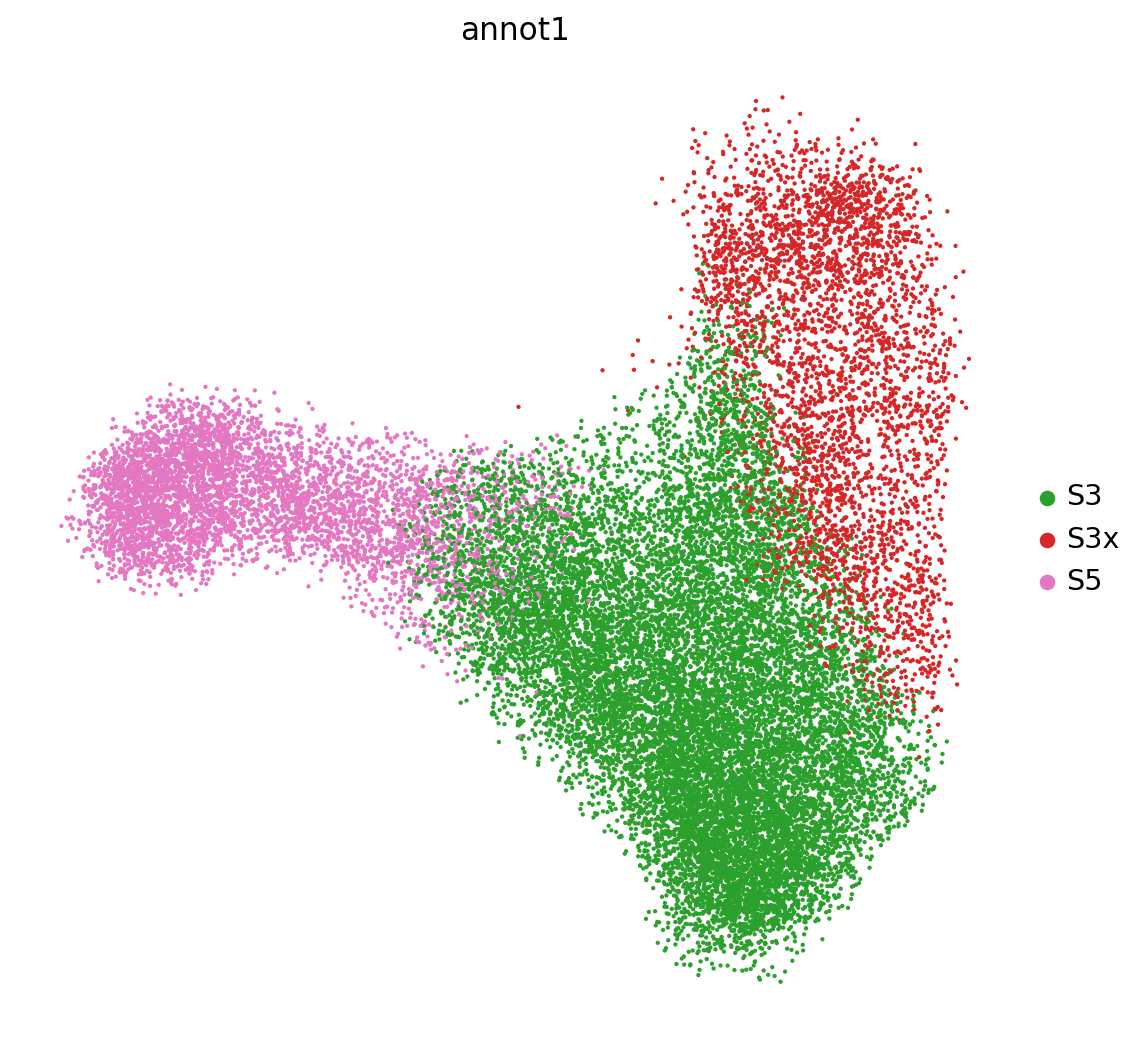

In [16]:
sc.pl.embedding(
    atac,
    #basis="diffmap",
    basis="umap",
    color='annot1',
    frameon=False,
    size=15,  # point size
    #legend_loc='on data',
)

In [17]:
# # plot new UMAP
# sc.set_figure_params(dpi_save=300, figsize=(8, 8))

# sc.pl.umap(
#     atac,
#     color='annot1',
#     frameon=False,
#     size=15,  # point size
#     #legend_loc='on data',
# )

In [43]:
# scFates graph on pca representation
scf.tl.tree(atac, method="ppt", Nodes=200,
            use_rep="umap",
            device="cpu", seed=1,
            #ppt_lambda=100,
            #ppt_sigma=0.025,
            ppt_sigma=0.5,
            ppt_lambda=2,
            ppt_nsteps=200)

inferring a principal tree --> parameters used 
    200 principal points, sigma = 0.5, lambda = 2, metric = euclidean
    fitting:   5%|▌         | 10/200 [00:03<01:07,  2.80it/s]
    converged
    more than 30 tips detected!
    finished (0:00:03) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


In [53]:
# Diffussion map on neighborhood graph
#sc.tl.diffmap(atac, )

In [51]:
atac

AnnData object with n_obs × n_vars = 24491 × 407383
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 

In [48]:
# Lower dimensional (2D) UMAP for visualization
#sc.tl.umap(atac)

In [49]:
sc.set_figure_params(dpi_save=300, figsize=(7, 6.5))

scf.pl.graph(atac,
             #color_cells="CD34",
             tips=False, forks=False, size_nodes=10, alpha_seg=1.0, basis="umap", cmap="Spectral_r",
    #save="_RNA_scFates_PCA_CD34_" + name + ".pdf"
)

In [17]:
atac.var.index[atac.var.index.str.contains("CXCL5")]

Index(['chr4:73994318-73994818,CXCL5,Distal',
       'chr4:73994978-73995478,CXCL5,Distal',
       'chr4:73996115-73996615,CXCL5,Exonic',
       'chr4:73998468-73998968,CXCL5,Promoter',
       'chr4:74005353-74005853,CXCL5,Distal',
       'chr4:74006104-74006604,CXCL5,Distal',
       'chr4:74009246-74009746,CXCL5,Distal',
       'chr4:74018029-74018529,CXCL5,Distal'],
      dtype='object', name='index')

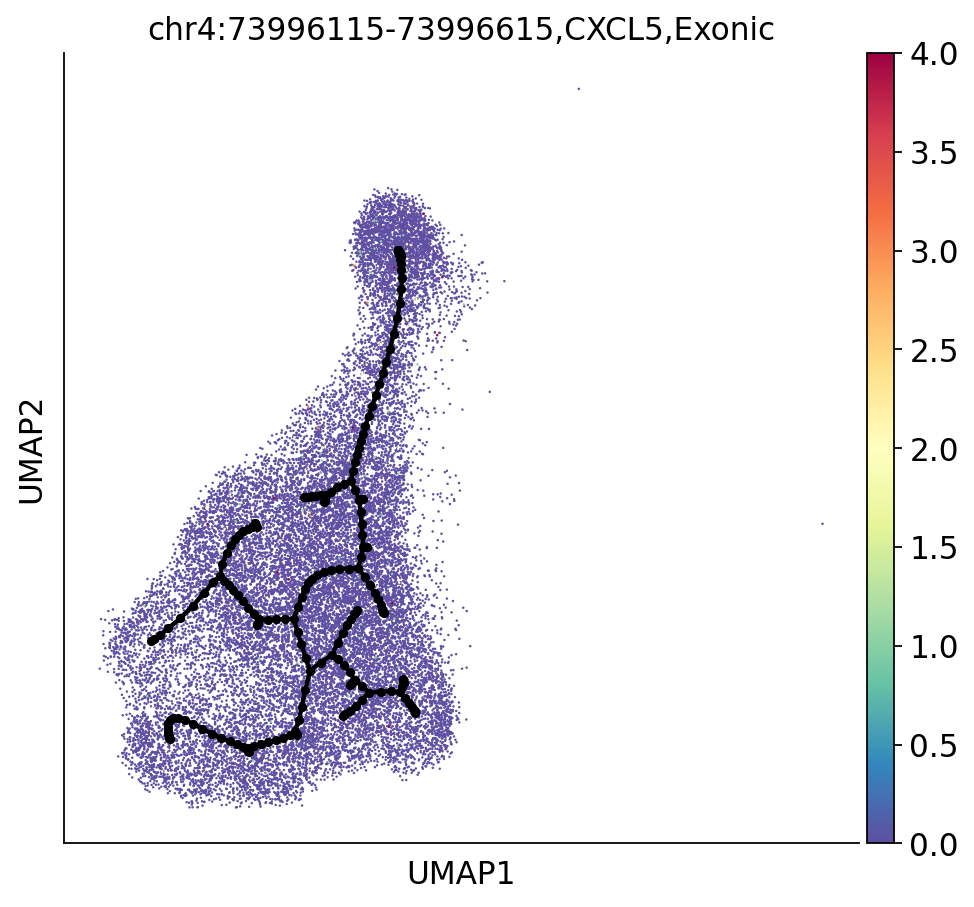

In [18]:
scf.pl.graph(atac, 
             color_cells="chr4:73996115-73996615,CXCL5,Exonic",
             tips=False, forks=False, size_nodes=10, alpha_seg=1.0, basis="umap", cmap="Spectral_r",
             #save="_RNA_scFates_PCA_CXCL5_" + name + ".pdf"
)

In [19]:
sc.set_figure_params(dpi_save=300, figsize=(7, 7.0))

scf.pl.graph(atac, color_cells="annot1", tips=False, forks=False, size_nodes=10, alpha_seg=1.0, basis="umap",
             title="scRNA-seq, scFates",
             #save="_RNA_scFates_PCA_annot_" + name + ".pdf"
)

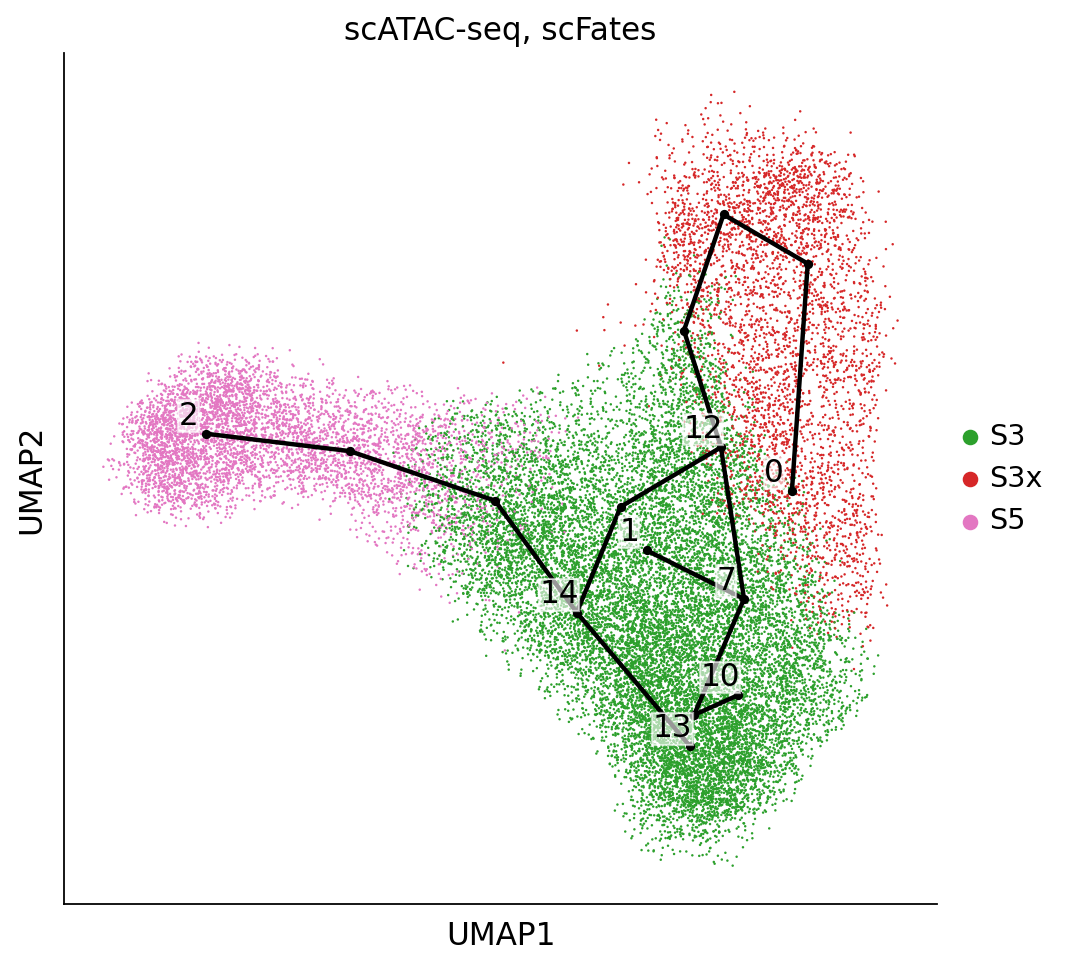

In [24]:
# Plot node numbers
scf.pl.graph(atac, color_cells="annot1", tips=True, size_nodes=10, alpha_seg=1.0, basis="umap",
             title="scATAC-seq, scFates")

In [25]:
# # On Single segment hypothesis 
# scf.tl.curve(rna, Nodes=30, use_rep="pca", ndims_rep=20)

# scf.pl.graph(rna, basis="umap")

In [26]:
# set root and calculate global pseudotime
scf.tl.root(atac, 0)

node 0 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [27]:
#rna.uns['graph']

In [28]:
%env PYTHONWARNINGS=ignore::FutureWarning

# Not sure why these fail

#import warnings
#warnings.filterwarnings('ignore')
#warnings.simplefilter('ignore')

#scf.tl.pseudotime(rna, n_jobs=8, n_map=100, seed=42)
#scf.tl.pseudotime(rna, n_jobs=20, n_map=100, seed=42)
scf.tl.pseudotime(atac, n_jobs=8, n_map=1, seed=42)
#scf.tl.pseudotime(rna, n_jobs=1, n_map=1, seed=42)

env: PYTHONWARNINGS=ignore::FutureWarning
projecting cells onto the principal graph
    finished (0:00:19) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


In [99]:
sc.set_figure_params(dpi_save=300, figsize=(4, 4))

scf.pl.trajectory(atac, cmap_seg="Spectral_r", color_cells="annot1", title="scFates", save="_ATAC_trajectory_" + name + ".pdf")

In [30]:
#scf.tl.dendrogram(rna)

In [31]:
#sc.set_figure_params(dpi_save=300, figsize=(3, 7))

#scf.pl.dendrogram(rna, color="annot1", linewidth_seg=1, tree_behind=True, alpha_seg=0.8, title="", save="_RNA_scFates_S3S5.pdf")


In [32]:
scf.tl.test_association(atac, n_jobs=8)  # memory intensive


test features for association with the trajectory
    single mapping : 100%|██████████| 20145/20145 [38:26<00:00,  8.74it/s]
    found 484 significant features (0:38:26) --> added
    .var['p_val'] values from statistical test.
    .var['fdr'] corrected values from multiple testing.
    .var['st'] proportion of mapping in which feature is significant.
    .var['A'] amplitue of change of tested feature.
    .var['signi'] feature is significantly changing along pseudotime.
    .uns['stat_assoc_list'] list of fitted features on the graph for all mappings.


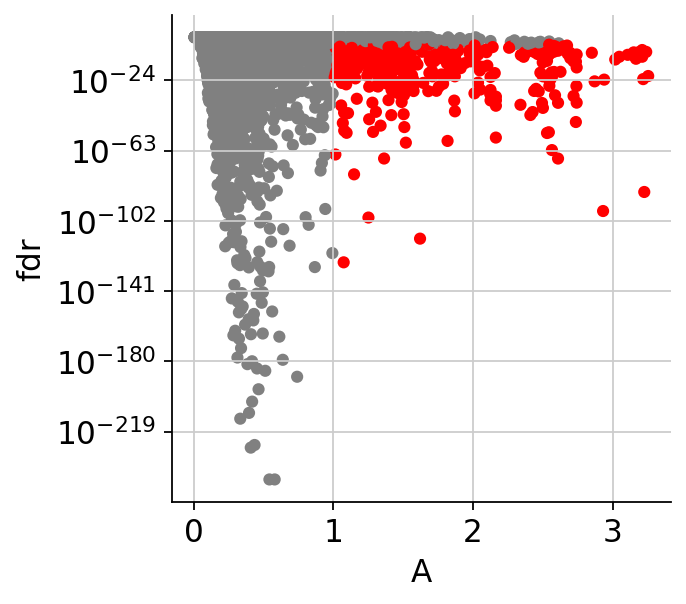

In [33]:
sc.set_figure_params()
scf.pl.test_association(atac)

In [34]:
%env PYTHONWARNINGS=ignore::FutureWarning

scf.tl.fit(atac, n_jobs=8)

env: PYTHONWARNINGS=ignore::FutureWarning
fit features associated with the trajectory
    single mapping : 100%|██████████| 484/484 [04:10<00:00,  1.93it/s]
    finished (adata subsetted to keep only fitted features!) (0:04:16) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [35]:
# Inspect table of genes associated with. pseudotime
tab = atac.var.copy()

#tab = tab.sort_values(by="A", ascending=False)

tab = tab.sort_values(by="p_val")

#tab.head(50)

idx     cc   mito   ribo  \
index                                                                      
chr12:54302100-54302600,COPZ1,Promoter        24535  False  False  False   
chr11:21988408-21988908,ANO5,Distal            7479  False  False  False   
chr11:2440871-2441371,KCNQ1,Distal             4001  False  False  False   
chr11:27925990-27926490,MIR610,Distal             6  False  False  False   
chr4:89412074-89412574,GPRIN3,Distal           6727  False  False  False   
chr5:132505474-132505974,IRF1,Distal           6505  False  False  False   
chr5:169164340-169164840,MIR585,Intronic      12653  False  False  False   
chr21:40120882-40121382,MIR4760,Intronic       8730  False  False  False   
chr6:118748756-118749256,CEP85L,Distal         4113  False  False  False   
chr3:70980561-70981061,FOXP1-AS1,Intronic      2295  False  False  False   
chr1:14142341-14142841,PRDM2,Distal            3293  False  False  False   
chrX:50768784-50769284,SHROOM4,Intronic        4239  False  False  False   
chr8:69178921-69179421,LINC01592,Distal        3283  False  False  False   
chr10:122491149-122491649,HTRA1,Intronic       1475  False  False  False   
chr22:50400058-50400558,PPP6R2,Intronic       17952  False  False  False   
chr9:89226128-89226628,SHC3,Distal            21408  False  False  False   
chr12:5945087-5945587,ANO2,Intronic           17247  False  False  False   
chr3:11227938-11228438,ATG7,Intronic          13262  False  False  False   
chr6:39930139-39930639,MOCS1,Intronic          9915  False  False  False   
chr8:105102590-105103090,ZFPM2,Intronic        7752  False  False  False   
chr2:70083294-70083794,PCBP1,Exonic           11211  False  False  False   
chr2:57497427-57497927,VRK2,Distal             9280  False  False  False   
chr8:106510097-106510597,OXR1,Intronic         7900  False  False  False   
chr2:187187399-187187899,CALCRL,Distal         2935  False  False  False   
chr6:41636802-41637302,MDFI,Exonic            10167  False  False  False   
chr9:35646055-35646555,LOC101926948,Promoter  17691  False  False  False   
chr16:87950217-87950717,BANP,Exonic           18461  False  False  False   
chr14:102070425-102070925,WDR20,Distal        14086  False  False  False   
chr2:64404704-64405204,LGALSL,Distal           9970  False  False  False   
chr3:20225715-20226215,LOC101927829,Intronic  14992  False  False  False   
chr2:220221912-220222412,MIR4268,Distal        7758  False  False  False   
chr4:33658925-33659425,LOC101928622,Distal     1470  False  False  False   
chr17:44170397-44170897,ASB16,Intronic         3181  False  False  False   
chr4:3041118-3041618,HTT-AS,Distal            18232  False  False  False   
chr18:78419002-78419502,LINC01029,Distal         94  False  False  False   
chr14:39169393-39169893,TRAPPC6B,Intronic      4645  False  False  False   
chr7:7350595-7351095,LOC101927354,Distal      14718  False  False  False   
chr19:45446136-45446636,MIR6088,Intronic      10097  False  False  False   
chr2:127884678-127885178,AMMECR1L,Intronic    17255  False  False  False   
chr4:8400569-8401069,TRMT44,Intronic          19447  False  False  False   
chr16:89938561-89939061,DEF8,Distal           19094  False  False  False   
chr2:30444207-30444707,LCLAT1,Distal           5279  False  False  False   
chr2:21224170-21224670,TDRD15,Distal           3397  False  False  False   
chr9:38714035-38714535,ANKRD18A,Distal        18328  False  False  False   
chr15:47195929-47196429,SEMA6D,Intronic       18314  False  False  False   
chr2:6992049-6992549,RNF144A-AS1,Intronic       744  False  False  False   
chr10:15627649-15628149,ITGA8,Intronic         2157  False  False  False   
chr13:23899530-23900030,C1QTNF9B,Intronic     10738  False  False  False   
chr18:75053790-75054290,ZADH2,Intronic        20189  False  False  False   
chr6:133768853-133769353,LINC01312,Intronic    5941  False  False  False   

                                                 hb  n_counts  n_cells  \
index                

In [36]:
# Milestones map
sc.set_figure_params(dpi_save=300, figsize=(4, 4))

scf.pl.trajectory(atac, cmap_seg="Spectral_r", color_cells="milestones",
                  #title="scFates",
                  title="scFate milestones",
                  #save="_RNA_trajectory_milestones_" + name +".pdf"
)

scf.pl.milestones(atac, 
                  #show=False, 
                  annotate=True)

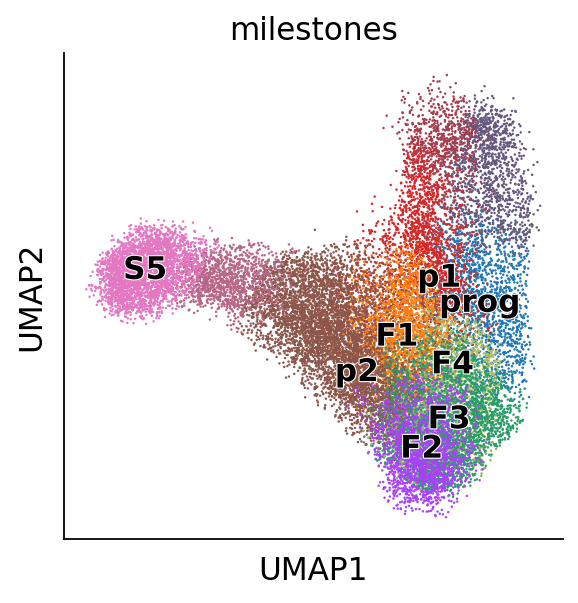

In [37]:
scf.tl.rename_milestones(atac, ["prog", "F1", "F3", "p1", "F2", "p2", "S5", "F4"])
scf.pl.milestones(atac, 
                  #show=False, 
                  annotate=True)

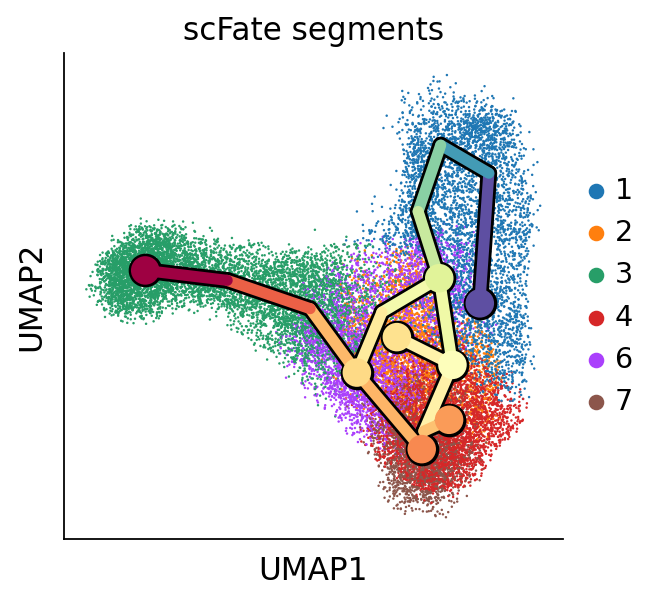

In [98]:
sc.set_figure_params(dpi_save=300, figsize=(4, 4))

# Plots adds uns['seg_color'] required downstream
scf.pl.trajectory(atac, cmap_seg="Spectral_r", color_cells="seg",
                  #title="scFates",
                  title="scFate segments",
                  #save="_RNA_trajectory_milestones_" + name +".pdf"
)

In [86]:
atac

AnnData object with n_obs × n_vars = 24491 × 484
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_

In [38]:
#exclude_markers = ["FOS", "NCALD"]
#tab.index.drop(exclude_markers)[0:50]

In [39]:
#scf.tl.test_fork(rna, root_milestone="prog", milestones=["p1", "p2", "S5"], n_jobs=8, rescale=True)

In [87]:
atac.var.index[atac.var.index.str.contains("MMP1")]

Index(['chr12:55842057-55842557,MMP19,Intronic'], dtype='object', name='index')

In [88]:
#atac.var

In [89]:
atac

AnnData object with n_obs × n_vars = 24491 × 484
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_

In [115]:
tab

idx     cc   mito   ribo     hb  \
index                                                                           
chr12:54302100-54302600,COPZ1,Promoter      24535  False  False  False  False   
chr11:21988408-21988908,ANO5,Distal          7479  False  False  False  False   
chr11:2440871-2441371,KCNQ1,Distal           4001  False  False  False  False   
chr11:27925990-27926490,MIR610,Distal           6  False  False  False  False   
chr4:89412074-89412574,GPRIN3,Distal         6727  False  False  False  False   
...                                           ...    ...    ...    ...    ...   
chr1:204983121-204983621,CNTN2,Intronic     30760  False  False  False  False   
chr22:38104108-38104608,BAIAP2L2,Intronic   14870  False  False  False  False   
chr6:155317158-155317658,TFB1M,Distal        9733  False  False  False  False   
chr17:50372951-50373451,MRPL27,Promoter      4743  False  False  False  False   
chr1:242214283-242214783,MAP1LC3C,Intronic  36927  False  False  False  False   

                                            n_counts  n_cells  \
index                                                           
chr12:54302100-54302600,COPZ1,Promoter       11596.0     4678   
chr11:21988408-21988908,ANO5,Distal            119.0       72   
chr11:2440871-2441371,KCNQ1,Distal           10940.0     5304   
chr11:27925990-27926490,MIR610,Distal          258.0      120   
chr4:89412074-89412574,GPRIN3,Distal           330.0      176   
...                                              ...      ...   
chr1:204983121-204983621,CNTN2,Intronic       2041.0     1034   
chr22:38104108-38104608,BAIAP2L2,Intronic      399.0      225   
chr6:155317158-155317658,TFB1M,Distal          421.0      234   
chr17:50372951-50373451,MRPL27,Promoter        341.0      189   
chr1:242214283-242214783,MAP1LC3C,Intronic     326.0      176   

                                            highly_variable     means  \
index                                                                   
chr12:54302100-54302600,COPZ1,Promoter                 True  1.705377   
chr11:21988408-21988908,ANO5,Distal                    True  2.207610   
chr11:2440871-2441371,KCNQ1,Distal                     True  1.660088   
chr11:27925990-27926490,MIR610,Distal                  True  2.609379   
chr4:89412074-89412574,GPRIN3,Distal                   True  2.609379   
...                                                     ...       ...   
chr1:204983121-204983621,CNTN2,Intronic                True  1.658243   
chr22:38104108-38104608,BAIAP2L2,Intronic              True  4.129621   
chr6:155317158-155317658,TFB1M,Distal                  True  4.158149   
chr17:50372951-50373451,MRPL27,Promoter                True  4.158149   
chr1:242214283-242214783,MAP1LC3C,Intronic             True  4.301977   

                                            dispersions  dispersions_norm  \
index                                                                       
chr12:54302100-54302600,COPZ1,Promoter         7.294209          0.832907   
chr11:21988408-21988908,ANO5,Distal            9.999628          1.371210   
chr11:2440871-2441371,KCNQ1,Distal             7.446068          0.928792   
chr11:27925990-27926490,MIR610,Distal          9.999424          0.890031   
chr4:89412074-89412574,GPRIN3,Distal           9.999424          0.890031   
...                                                 ...               ...   
chr1:204983121-204983621,CNTN2,Intronic        8.581327          1.645607   
chr22:38104108-38104608,BAIAP2L2,Intronic      9.997215          0.719611   
chr6:155317158-155317658,TFB1M,Distal          9.997133          0.719321   
chr17:50372951-50373451,MRPL27,Promoter        9.997133          0.719321   
chr1:242214283-242214783,MAP1LC3C,Intronic     9.996683          0.717728   

                                            highly_variable_nbatches  \
index                                                                  
chr12:54302100-54302600,COPZ1,Promoter            

In [107]:
# Markers that are primarily detected in side branches, found among top 100

#features = tab.index.drop(exclude_markers)[0:50]
features = tab.index[0:500]

# Heatmap of top genes
# For some reason this plots to ./figures/
scf.pl.trends(atac,
              features=features,
              n_features=10,  # features to highlight   
              plot_emb=False,
              show_segs=True,
              annot="milestones",
              #annot="annot1",
              root_milestone="prog",
              
              milestones=["prog", "p1", "p2", "S5"],

              figsize=(5, 10),  # width, height
              pseudo_cmap="Spectral_r",
              #save="_ATAC_trajectory_core_selected_top50_" + name + ".pdf"
)


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

In [42]:
# Heatmap of all 
features=tab.head(50).index  # all top markers

# Heatmap of top genes
# For some reason this plots to ./figures/
scf.pl.trends(atac,
              features=features,
              n_features=30,  # features to highlight
              
              plot_emb=False,
              show_segs=True,
              annot="milestones",
              root_milestone="prog",
              #milestones=["prog", "p1", "p2", "F1", "F2", "F3", "F4", "S5"],

              figsize=(8, 10),  # width, height
              pseudo_cmap="Spectral_r",
              #save="_ATAC_trajectory_all_top50_" + name + ".pdf"
)

## Fit model to subset along primary trajectory

In [120]:
atac_sub = atac[atac.obs.milestones.isin(["prog", "p1", "p2", "S5"])]

In [121]:
atac_sub

View of AnnData object with n_obs × n_vars = 15202 × 484
    obs: 'BlacklistRatio', 'DoubletEnrichment', 'DoubletScore', 'nDiFrags', 'nFrags', 'nMonoFrags', 'nMultiFrags', 'NucleosomeRatio', 'PromoterRatio', 'ReadsInBlacklist', 'ReadsInPromoter', 'ReadsInTSS', 'Sample_x', 'TSSEnrichment', 'Clusters', 'predictedCell_Un', 'predictedGroup_Un', 'predictedScore_Un', 'predictedCell_Co', 'predictedGroup_Co', 'predictedScore_Co', 'Clusters_hm', 'predictedCell_Un_hm', 'predictedGroup_Un_hm', 'predictedScore_Un_hm', 'predictedCell_Co_hm', 'predictedGroup_Co_hm', 'predictedScore_Co_hm', 'predictedCell', 'predictedGroup', 'predictedScore', 'Annot', 'Clusters1', 'ReadsInPeaks', 'FRIP', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample_y', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mi

In [122]:
%env PYTHONWARNINGS=ignore::FutureWarning

scf.tl.fit(atac_sub, n_jobs=8)

env: PYTHONWARNINGS=ignore::FutureWarning
fit features associated with the trajectory
    single mapping : 100%|██████████| 484/484 [03:03<00:00,  2.64it/s]
    finished (adata subsetted to keep only fitted features!) (0:03:09) --> added
    .layers['fitted'], fitted features on the trajectory for all mappings.
    .raw, unfiltered data.


In [130]:
# Inspect table of genes associated with. pseudotime
tab_sub = atac_sub.var.copy()

#tab = tab.sort_values(by="A", ascending=False)

tab_sub = tab_sub.sort_values(by="p_val")

tab_sub.head(10)

idx     cc   mito   ribo     hb  \
index                                                                          
chr12:54302100-54302600,COPZ1,Promoter     24535  False  False  False  False   
chr11:21988408-21988908,ANO5,Distal         7479  False  False  False  False   
chr11:2440871-2441371,KCNQ1,Distal          4001  False  False  False  False   
chr11:27925990-27926490,MIR610,Distal          6  False  False  False  False   
chr4:89412074-89412574,GPRIN3,Distal        6727  False  False  False  False   
chr5:132505474-132505974,IRF1,Distal        6505  False  False  False  False   
chr5:169164340-169164840,MIR585,Intronic   12653  False  False  False  False   
chr21:40120882-40121382,MIR4760,Intronic    8730  False  False  False  False   
chr6:118748756-118749256,CEP85L,Distal      4113  False  False  False  False   
chr3:70980561-70981061,FOXP1-AS1,Intronic   2295  False  False  False  False   

                                           n_counts  n_cells  highly_variable  \
index                                                                           
chr12:54302100-54302600,COPZ1,Promoter      11596.0     4678             True   
chr11:21988408-21988908,ANO5,Distal           119.0       72             True   
chr11:2440871-2441371,KCNQ1,Distal          10940.0     5304             True   
chr11:27925990-27926490,MIR610,Distal         258.0      120             True   
chr4:89412074-89412574,GPRIN3,Distal          330.0      176             True   
chr5:132505474-132505974,IRF1,Distal        10760.0     5193             True   
chr5:169164340-169164840,MIR585,Intronic      144.0       83             True   
chr21:40120882-40121382,MIR4760,Intronic     8938.0     4251             True   
chr6:118748756-118749256,CEP85L,Distal       8129.0     3492             True   
chr3:70980561-70981061,FOXP1-AS1,Intronic     290.0      169             True   

                                              means  dispersions  \
index                                                              
chr12:54302100-54302600,COPZ1,Promoter     1.705377     7.294209   
chr11:21988408-21988908,ANO5,Distal        2.207610     9.999628   
chr11:2440871-2441371,KCNQ1,Distal         1.660088     7.446068   
chr11:27925990-27926490,MIR610,Distal      2.609379     9.999424   
chr4:89412074-89412574,GPRIN3,Distal       2.609379     9.999424   
chr5:132505474-132505974,IRF1,Distal       1.835707     7.412920   
chr5:169164340-169164840,MIR585,Intronic   2.540915     9.999464   
chr21:40120882-40121382,MIR4760,Intronic   2.188495     8.470765   
chr6:118748756-118749256,CEP85L,Distal     2.479732     9.145872   
chr3:70980561-70981061,FOXP1-AS1,Intronic  2.609379     9.999424   

                                           dispersions_norm  \
index                                                         
chr12:54302100-54302600,COPZ1,Promoter             0.832907   
chr11:21988408-21988908,ANO5,Distal                1.371210   
chr11:2440871-2441371,KCNQ1,Distal                 0.928792   
chr11:27925990-27926490,MIR610,Distal              0.890031   
chr4:89412074-89412574,GPRIN3,Distal               0.890031   
chr5:132505474-132505974,IRF1,Distal               0.907862   
chr5:169164340-169164840,MIR585,Intronic           0.890065   
chr21:40120882-40121382,MIR4760,Intronic           0.982367   
chr6:118748756-118749256,CEP85L,Distal             0.784438   
chr3:70980561-70981061,FOXP1-AS1,Intronic          0.890031   

                                           highly_variable_nbatches  \
index                                                                 
chr12:54302100-54302600,COPZ1,Promoter                           12   
chr11:21988408-21988908,ANO5,Distal                               0   
chr11:2440871-2441371,KCNQ1,Distal                                2   
chr11:27925990-27926490,MIR610,Distal                             0   
chr4:89412074-89412574,GPRIN3,Distal                              0   
chr5:132505474-132505974,IRF1,Distal    

In [131]:
# Heatmap of all 
features=tab_sub.head(500).index  # all top markers

# Heatmap of top genes
# For some reason this plots to ./figures/
scf.pl.trends(atac_sub,
              features=features,
              n_features=30,  # features to highlight
              plot_emb=False,
              show_segs=True,
              annot="milestones",
              root_milestone="prog",
              #milestones=["prog", "p1", "p2", "F1", "F2", "F3", "F4", "S5"],

              figsize=(8, 10),  # width, height
              pseudo_cmap="Spectral_r",
              #save="_ATAC_trajectory_all_top50_" + name + ".pdf"
)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

# old analysis

IndexError: single positional indexer is out-of-bounds

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

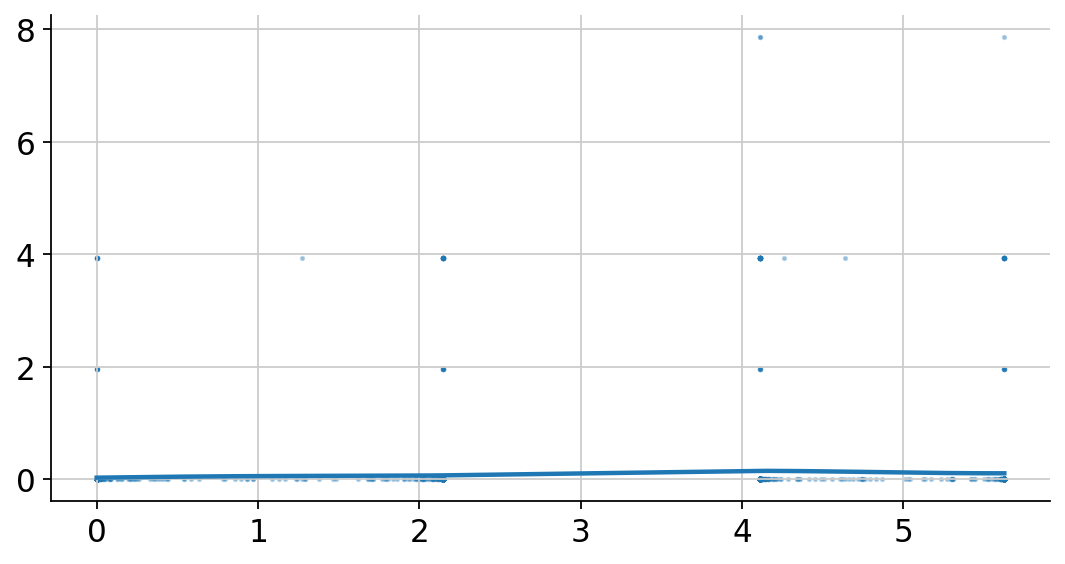

In [132]:

sc.set_figure_params(figsize=(2, 4), frameon=False)

#sc.set_figure_params(figsize=(10, 10), frameon=False)
scf.set_figure_pubready()

#scf.pl.single_trend(atac, "chr12:55842057-55842557,MMP19,Intronic", wspace=-.15)

scf.pl.single_trend(atac, features[2], wspace=-.15, plot_emb=False)
#scf.pl.single_trend(atac, features[5], wspace=-.15, plot_emb=False)

In [123]:
#import seaborn

In [125]:
#atac

In [103]:
#seaborn.scatterplot(x=atac.obs.t, y=atac.obs.t)

In [126]:
#seaborn.scatterplot(x=atac.obs.t, y=atac.X.toarray()[:,200])

In [ ]:
# scf.pl.matrix(atac, features=features, cmap="RdBu_r", nbins=10, annot_var=True,
#               #save="_trajectory_all_top50_" + name + ".pdf"
# )

In [ ]:
#sc.pl.dpt_groups_pseudotime(rna)

In [ ]:
#rna.obs['dpt_order_indices'] = rna.obs.t

In [ ]:
#sc.pl.dpt_timeseries(rna, dpt_timeseries)

In [109]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
sc.set_figure_params(figsize=(2, 4),frameon=False)

for gene in tab.index[0:100]:
    scf.pl.single_trend(rna, gene, wspace=-.15)

In [ ]:
# Plot early, intermediate and late genes
sc.set_figure_params(figsize=(2, 4), frameon=False)

intermediate = [    
    'TNFRSF11B',
    'STC1',
    'LOXL2',
    'IDO1'
]

early = [    
    'CTHRC1',
    'PFN1',
    'LTBP1',
    'IER3',
    'HLA-C',
    'ADAMTS2',
    'TPM2',
    'HIF1A',
    'RABAC1',
    'ACTN1',
    'LY6E',
    'SLC39A14',
    'EPAS1',
    'WARS'
]

late = [
    'FBXO32',
    'VMO1',
    'WISP1',
    'CLU',
    'CYBA',
    'BMP1'
]

for gene in early:
    scf.pl.single_trend(rna, gene, wspace=-.15, save="_early_" + gene + "_" + name + ".pdf")

for gene in intermediate:
    scf.pl.single_trend(rna, gene, wspace=-.15, save="_intermediate_" + gene + "_" + name + ".pdf")

for gene in late:
    scf.pl.single_trend(rna, gene, wspace=-.15, save="_late_" + gene + "_" + name + ".pdf")


In [ ]:
scf.pl.trends(rna,
              features=early,
              n_features=30,  # features to highlight
              
              plot_emb=False,
              show_segs=True,
              annot="milestones",
              root_milestone="prog",
              milestones=["prog", "p1", "p2", "S5"],

              figsize=(5, 5),  # width, height
              pseudo_cmap="Spectral_r",
              save="_trajectory_core_selected_top50_early_" + name + ".pdf"
)


In [ ]:
scf.pl.trends(rna,
              features=intermediate,
              n_features=30,  # features to highlight
              
              plot_emb=False,
              show_segs=True,
              annot="milestones",
              root_milestone="prog",
              milestones=["prog", "p1", "p2", "S5"],

              figsize=(5, 1.8),  # width, height
              pseudo_cmap="Spectral_r",
              save="_trajectory_core_selected_top50_intermediate_" + name + ".pdf"
)

In [ ]:
scf.pl.trends(rna,
              features=late,
              title="late",
              n_features=30,  # features to highlight
              
              plot_emb=False,
              show_segs=True,
              annot="milestones",
              root_milestone="prog",
              milestones=["prog", "p1", "p2", "S5"],

              figsize=(5, 2.5),  # width, height
              pseudo_cmap="Spectral_r",
              save="_trajectory_core_selected_top50_late_" + name + ".pdf"
)

In [ ]:
# Genes enriched by regulons @Patrick
sc.set_figure_params(figsize=(2, 4), frameon=False)

# Factor 6 (factor 7 counting from 1)

#scf.set_figure_pubready()
scf.pl.single_trend(rna, "JUN", wspace=-.15)
scf.pl.single_trend(rna, "FOS", wspace=-.15)
scf.pl.single_trend(rna, "STAT1", wspace=-.15, save="_RNA_trajectory_" + name + "_STAT1.pdf")
#scf.pl.single_trend(rna, "TFEC", wspace=-.15)
#scf.pl.single_trend(rna, "BATF", wspace=-.15)
scf.pl.single_trend(rna, "CEBPB", wspace=-.15, save="_RNA_trajectory_" + name + "_CEBPB.pdf")
scf.pl.single_trend(rna, "RELB", wspace=-.15, save="_RNA_trajectory_" + name + "_RELB.pdf")
scf.pl.single_trend(rna, "PRDM1", wspace=-.15, save="_RNA_trajectory_" + name + "_PRDM1.pdf")
scf.pl.single_trend(rna, "FOSL2", wspace=-.15)
scf.pl.single_trend(rna, "KLF4", wspace=-.15)
scf.pl.single_trend(rna, "XBP1", wspace=-.15)
scf.pl.single_trend(rna, "CEBPD", wspace=-.15)
#scf.pl.single_trend(rna, "ELF3", wspace=-.15)
scf.pl.single_trend(rna, "ATF3", wspace=-.15)
scf.pl.single_trend(rna, "PRRX1", wspace=-.15, save="_RNA_trajectory_" + name + "_PRRX1.pdf")
scf.pl.single_trend(rna, "IRF9", wspace=-.15)
scf.pl.single_trend(rna, "JUNB", wspace=-.15)
scf.pl.single_trend(rna, "EGR1", wspace=-.15)
#scf.pl.single_trend(rna, "FOSL1", wspace=-.15)
#scf.pl.single_trend(rna, "HNF4A", wspace=-.15)
#scf.pl.single_trend(rna, "KDM5B", wspace=-.15)
#scf.pl.single_trend(rna, "SPI1", wspace=-.15)
scf.pl.single_trend(rna, "ETS2", wspace=-.15, save="_RNA_trajectory_" + name + "_ETS2.pdf")



In [ ]:
# sc.set_figure_params(figsize=(2, 4),frameon=False)
# # scf.set_figure_pubready()
# scf.pl.single_trend(rna, "COL14A1", wspace=-.15)
# scf.pl.single_trend(rna, "NOV", wspace=-.15)
# scf.pl.single_trend(rna, "TNFRSF11B", wspace=-.15)

In [ ]:


sc.set_figure_params(figsize=(2, 4),frameon=False)
# scf.set_figure_pubready()
scf.pl.single_trend(rna, "CXCL5", wspace=-.15)
scf.pl.single_trend(rna, "CD34", wspace=-.15)
#scf.pl.single_trend(rna, "FBXO32", wspace=-.15)
# #scf.pl.single_trend(rna, "GATA1", basis="dendro", wspace=-.25)

In [ ]:
# sc.pl.draw_graph(rna, color=["seg","milestones"])

In [ ]:
# sc.set_figure_params(dpi_save=300, figsize=(7, 6.5))

# sc.pl.embedding(rna, color=["seg", "milestones"], basis="umap", legend_loc="on data", show=False)


In [ ]:
#scf.tl.test_fork(rna, root_milestone="2", milestones=["0", "3", "4", "2"], n_jobs=8, rescale=True)


In [ ]:
# scf.pl.trends(rna, 
#                  #root_milestone="2",
#                  #milestones=["0", "2"],
#                  #branch="Ery",
#                  plot_emb=False, ordering="max", return_genes=True)

In [ ]:
# print raw count matrix
#print(rna.raw.X[1:20, 1:10])

In [ ]:
#print(rna.X[1:20, 1:10])

In [ ]:
#scf.tl.root(adata,163)

# palantir diffussion map
High-resolution or continous trajectory inference

In [ ]:
adata = rna.copy()

In [ ]:
pca_projections = pd.DataFrame(adata.obsm["X_pca"], index=adata.obs_names)


In [ ]:
# Run palantir
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=20)

ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=15)


In [ ]:
adata.obsm["X_palantir"] = ms_data.values

In [ ]:
sc.pp.neighbors(adata, n_neighbors=40, use_rep="X_palantir")

In [ ]:
sc.tl.umap(adata)

In [ ]:
sc.set_figure_params(dpi_save=300, figsize=(4, 4))

sc.pl.umap(adata, color=["annot1", "CD34", "CXCL5"], title="scRNA-seq, Palantir diffusion map", save="_RNA_Palantir_diffusion_" + name + ".pdf")

In [ ]:
adata

In [ ]:
adata.obs.index

In [ ]:
start_cell = adata.obs.index[adata.obsm['X_umap'][:, 0].argmin()]  # leftmost cell on UMAP

In [ ]:
# MAGIC imputation
#imputed_X = palantir.utils.run_magic_imputation(adata)

In [ ]:
pal_results = palantir.core.run_palantir(
    adata,
    start_cell,
    num_waypoints=500,
    #terminal_states=terminal_states
)

In [ ]:
# palantir.plot.plot_diffusion_components(adata)
# plt.show()

In [ ]:
#sc.pl.draw_graph(adata, color="CD34",color_map="RdBu_r")


In [ ]:
scf.tl.tree(adata, method="ppt", Nodes=100, use_rep="palantir",
            device="cpu", seed=1, ppt_lambda=100, ppt_sigma=0.025, ppt_nsteps=200)

In [ ]:
scf.pl.graph(adata, forks=True, tips=True, size_nodes=5, linewidth=1)

In [ ]:
scf.tl.root(adata, 45)  # midpoint of CD34 cluster

In [ ]:
# Estimate pseudo-time
scf.tl.pseudotime(adata, n_jobs=1, n_map=100, seed=42)  # weird warnings


In [ ]:

scf.pl.trajectory(adata, scale_path=0.3, color_cells="annot1", cmap_seg="Spectral", save="_RNA_Palantir_trajectory_S3S5.pdf", title="scFates trajectory")

In [ ]:
sc.set_figure_params(dpi_save=300, figsize=(6, 5.5))

sc.pl.umap(adata, color=["t"], title="scRNA-seq, Palantir, scFates pseudo-time",
           #save="_RNA_Palantir_diffusion.pdf"
           #color_map="Spectrum_r"

           save="_RNA_Palantir_scFates_pseudotime_" + name + ".pdf"
)

In [ ]:
# Copy pseudo-time estimate to original AnnData object
rna.obs['t'] = adata.obs.t

In [ ]:
sc.pl.umap(rna, color=["t"],
           title="scRNA-seq, Palantir, scFates pseudo-time",
           #save="_RNA_Palantir_diffusion.pdf"
           #color_map="Spectrum_r"
           save="_RNA_Palantir_scFates_pseudotime_oriUMAP_" + name + ".pdf"
)

## Dendrogram visualizations

In [ ]:
# scf.tl.dendrogram(adata)

In [ ]:
# sc.set_figure_params(dpi_save=300, figsize=(3, 7))

# scf.pl.dendrogram(adata, color="annot1", linewidth_seg=1, tree_behind=True, alpha_seg=0.8, title="", save="_RNA_scFates_S3S5.pdf")


In [ ]:
#adata

In [ ]:
# scf.set_figure_pubready()

# scf.pl.single_trend(adata, "CXCL5", basis="dendro", wspace=-.25,
#                     #save="_E2.pdf"
# )

In [ ]:
#adata.obs.seg

In [ ]:
# Tree pseudotime association tests, per segment.
# Long runtime
#scf.tl.test_association(adata, n_jobs=6)  # memory intensive per job, ~6GB per job

In [ ]:
#scf.tl.fit(adata, n_jobs=4)

In [ ]:
# palantir.plot.plot_palantir_results(adata, s=3)
# plt.show()

In [ ]:
# sc.set_figure_params(dpi_save=300, figsize=(7, 7))

# scf.pl.milestones(adata)

In [ ]:
# draw Formilestonestlas2 embedding using 2 first PCs as initial positions
#adata.obsm["X_pca2d"]=adata.obsm["X_pca"][:,:2]
#sc.tl.draw_graph(adata, init_pos='X_pca2d')

In [ ]:
#sc.pl.draw_graph(adata, color="CD34", color_map="RdBu_r")

# Tests of single trajectory approach

In [ ]:

# On 
#scf.tl.curve(adata, Nodes=30, use_rep="X_umap", ndims_rep=2)

#scf.pl.graph(adata, basis="umap")